# Housing Kaggle Exploritory Data Analyses

## Data Import

In [31]:
# Setup Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from scipy.stats import norm, skew
from scipy.stats import pearsonr
%matplotlib inline

# Used for auto-formatting code
# terminal - pip install nb_black
%load_ext nb_black

# Display all rows and columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [52]:
# Import entire dataset
house_data = pd.read_csv("../Data/train.csv")
house_data.drop("Id", 1, inplace=True)  # remove ID column because useless
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<IPython.core.display.Javascript object>

In [53]:
# Determine size of dataset
house_data.shape  # 1460 rows x 80 columns

(1460, 80)

<IPython.core.display.Javascript object>

## Richard Kim Data Description

`MSZoning`

Type: Strictly Categorical

Desc: Identifies the general zoning classification of the sale.

levl: (8)

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
 
 Note: Maybe condense all residentials to one
 
`Street`

Type: Strictly Categorical 

Desc: Type of road access to property

levl: (2)

       Grvl	Gravel	
       Pave	Paved

`Alley`

Type: Strictly Categorical

Desc: Type of alley access to property

levl: (3)

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

`LotShape`

Type: Ordinal

Desc: General shape of property

levl: (4)

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

Note: Convert to range of 0-3. 

`LandContour`

Type: Strictly Categorical

Desc: Flatness of the property

levl: (4)

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression


`Utilities`

Type: Strictly Categorical

Desc: Type of utilities available

levl: (4)

       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	    Electricity only

Note: Absolutely useless

    AllPub NoSeWa
      1459      1

`LotConfig`

Type: Strictly Categorical

Desc: Lot configuration

levl: (5)

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

`LandSlope`

Type: Categorical -> Need to transform to ordinal

Desc: Slope of property

levl: (3)

       Gtl	Gentle slope (0)
       Mod	Moderate Slope (1)
       Sev	Severe Slope (2)

`Neighborhood`

Type: Stricly Categorical

Desc: Physical locations within Ames city limits

levl: (25)

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

`Condition1`, `Condition2`

Type: Strictly Categorical

Desc: Proximity to various conditions

levl: (9)

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Note: Count how many 'conditions' exist on a given house.

ex)

```R
hp %>% mutate(num_of_cond = ifelse(Condition1 == 'Norm', 0, ifelse(Condition2 == 'Norm', 1, 2)))
```

Use `number of conditions` as variable.

`BldgType`

Type: Strictly Categorical

Desc: Type of Dwelling

levl: (5)

       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

Note: Ordinal?

```R
hp <- hp %>% mutate(BldgTypetest = 
                ifelse(BldgType == '2fmCon',0,
                ifelse(BldgType == 'Duplex',1,
                ifelse(BldgType == 'Twnhs', 2,
                ifelse(BldgType == 'TwnhsE', 3, 4)))))
```

`HouseStyle`

Type: Strictly categorical

Desc: Style of dwelling

levl: (8)

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

`RoofStyle`

Type: Strictly Categorical

Desc: Type of roof

levl: (6)

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

`RoofMatl`

Type: Strictly Categorical

Desc: Roof material

levl: (8)

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
       
`Exterior1st`, `Exterior2nd`

Type: Strictly Categorical

Desc: Exterior covering on house

levl: (17)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles


Note: need to fix the typo issue on `Exsterior2nd`
```R
> hp$Exterior1st %>% levels()
 [1] "AsbShng" "AsphShn" "BrkComm" "BrkFace" "CBlock"  "CemntBd" "HdBoard"
 [8] "ImStucc" "MetalSd" "Plywood" "Stone"   "Stucco"  "VinylSd" "Wd Sdng"
[15] "WdShing"
> hp$Exterior2nd %>% levels()
 [1] "AsbShng" "AsphShn" "Brk Cmn" "BrkFace" "CBlock"  "CmentBd" "HdBoard"
 [8] "ImStucc" "MetalSd" "Other"   "Plywood" "Stone"   "Stucco"  "VinylSd"
[15] "Wd Sdng" "Wd Shng"
```

Also do a 'count of exterior' column?

`MasVnrType`

Type: Strictly Categorical

Desc: Masonry veneer type

levl: (5)

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

Note: NA-values.

`ExterQual`

Type: Categorical -> Ordinal

Desc: Evaluates the quality of the material on the exterior

levl: (5)

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Note:
```R
hp <- hp %>% mutate(ExterQualtest =
                      ifelse(ExterQual == 'Po', 0,
                      ifelse(ExterQual == 'Fa', 1,
                      ifelse(ExterQual == 'TA', 2,
                      ifelse(ExterQual == 'Gd', 3,4)))))
```

`ExterCond`

Type: Categorical -> Ordinal

Desc: Evaluates the present condition of the material on the exterior

levl: (5)

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Note:
```R
hp <- hp %>% mutate(ExterQualtest =
                      ifelse(ExterQual == 'Po', 0,
                      ifelse(ExterQual == 'Fa', 1,
                      ifelse(ExterQual == 'TA', 2,
                      ifelse(ExterQual == 'Gd', 3,4)))))
```
log(SalePrice) ~ ExterCond
coeff p-val = 0.507 (srsly?)

`Foundation`

Type: Strictly Categorical

Desc: Type of foundation

levl: (6)

       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood


Note: Ordinal? (based on cost of each foundation or what?)
```R
hp <- hp %>% mutate(Foundationtest =
                ifelse(Foundation == 'Slab', 0,
                ifelse(Foundation == 'Stone', 1,
                ifelse(Foundation == 'Wood', 2,
                ifelse(Foundation == 'BrkTil', 3,
                ifelse(Foundation == 'CBlock', 4,5
                ))))))
```


 
 

       ‘LotConfig’, ‘LandSlope’, ‘Neighborhood’, ‘Condition1’, ‘Condition2’,
       ‘BldgType’, ‘HouseStyle’, ‘RoofStyle’, ‘RoofMatl’, ‘Exterior1st’,
       ‘Exterior2nd’, ‘MasVnrType’, ‘ExterQual’, ‘ExterCond’, ‘Foundation’


In [54]:
# Log transform on response variable
house_data["SalePrice_log"] = np.log(house_data["SalePrice"])

<IPython.core.display.Javascript object>

## Quick View on Variables

In [55]:
rk_var = [
    "MSZoning",
    "Street",
    "Alley",
    "LotShape",
    "LandContour",
    "Utilities",
    "LotConfig",
    "LandSlope",
    "Neighborhood",
    "Condition1",
    "Condition2",
    "BldgType",
    "HouseStyle",
    "RoofStyle",
    "RoofMatl",
    "Exterior1st",
    "Exterior2nd",
    "MasVnrType",
    "ExterQual",
    "ExterCond",
    "Foundation",
]

<IPython.core.display.Javascript object>

In [56]:
house_data_rk_var = pd.DataFrame(house_data, columns=rk_var)

<IPython.core.display.Javascript object>

In [57]:
house_data_rk_var.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc


<IPython.core.display.Javascript object>

In [58]:
house_data_rk_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
MSZoning        1460 non-null object
Street          1460 non-null object
Alley           91 non-null object
LotShape        1460 non-null object
LandContour     1460 non-null object
Utilities       1460 non-null object
LotConfig       1460 non-null object
LandSlope       1460 non-null object
Neighborhood    1460 non-null object
Condition1      1460 non-null object
Condition2      1460 non-null object
BldgType        1460 non-null object
HouseStyle      1460 non-null object
RoofStyle       1460 non-null object
RoofMatl        1460 non-null object
Exterior1st     1460 non-null object
Exterior2nd     1460 non-null object
MasVnrType      1452 non-null object
ExterQual       1460 non-null object
ExterCond       1460 non-null object
Foundation      1460 non-null object
dtypes: object(21)
memory usage: 239.7+ KB


<IPython.core.display.Javascript object>

## Univariate Histograms

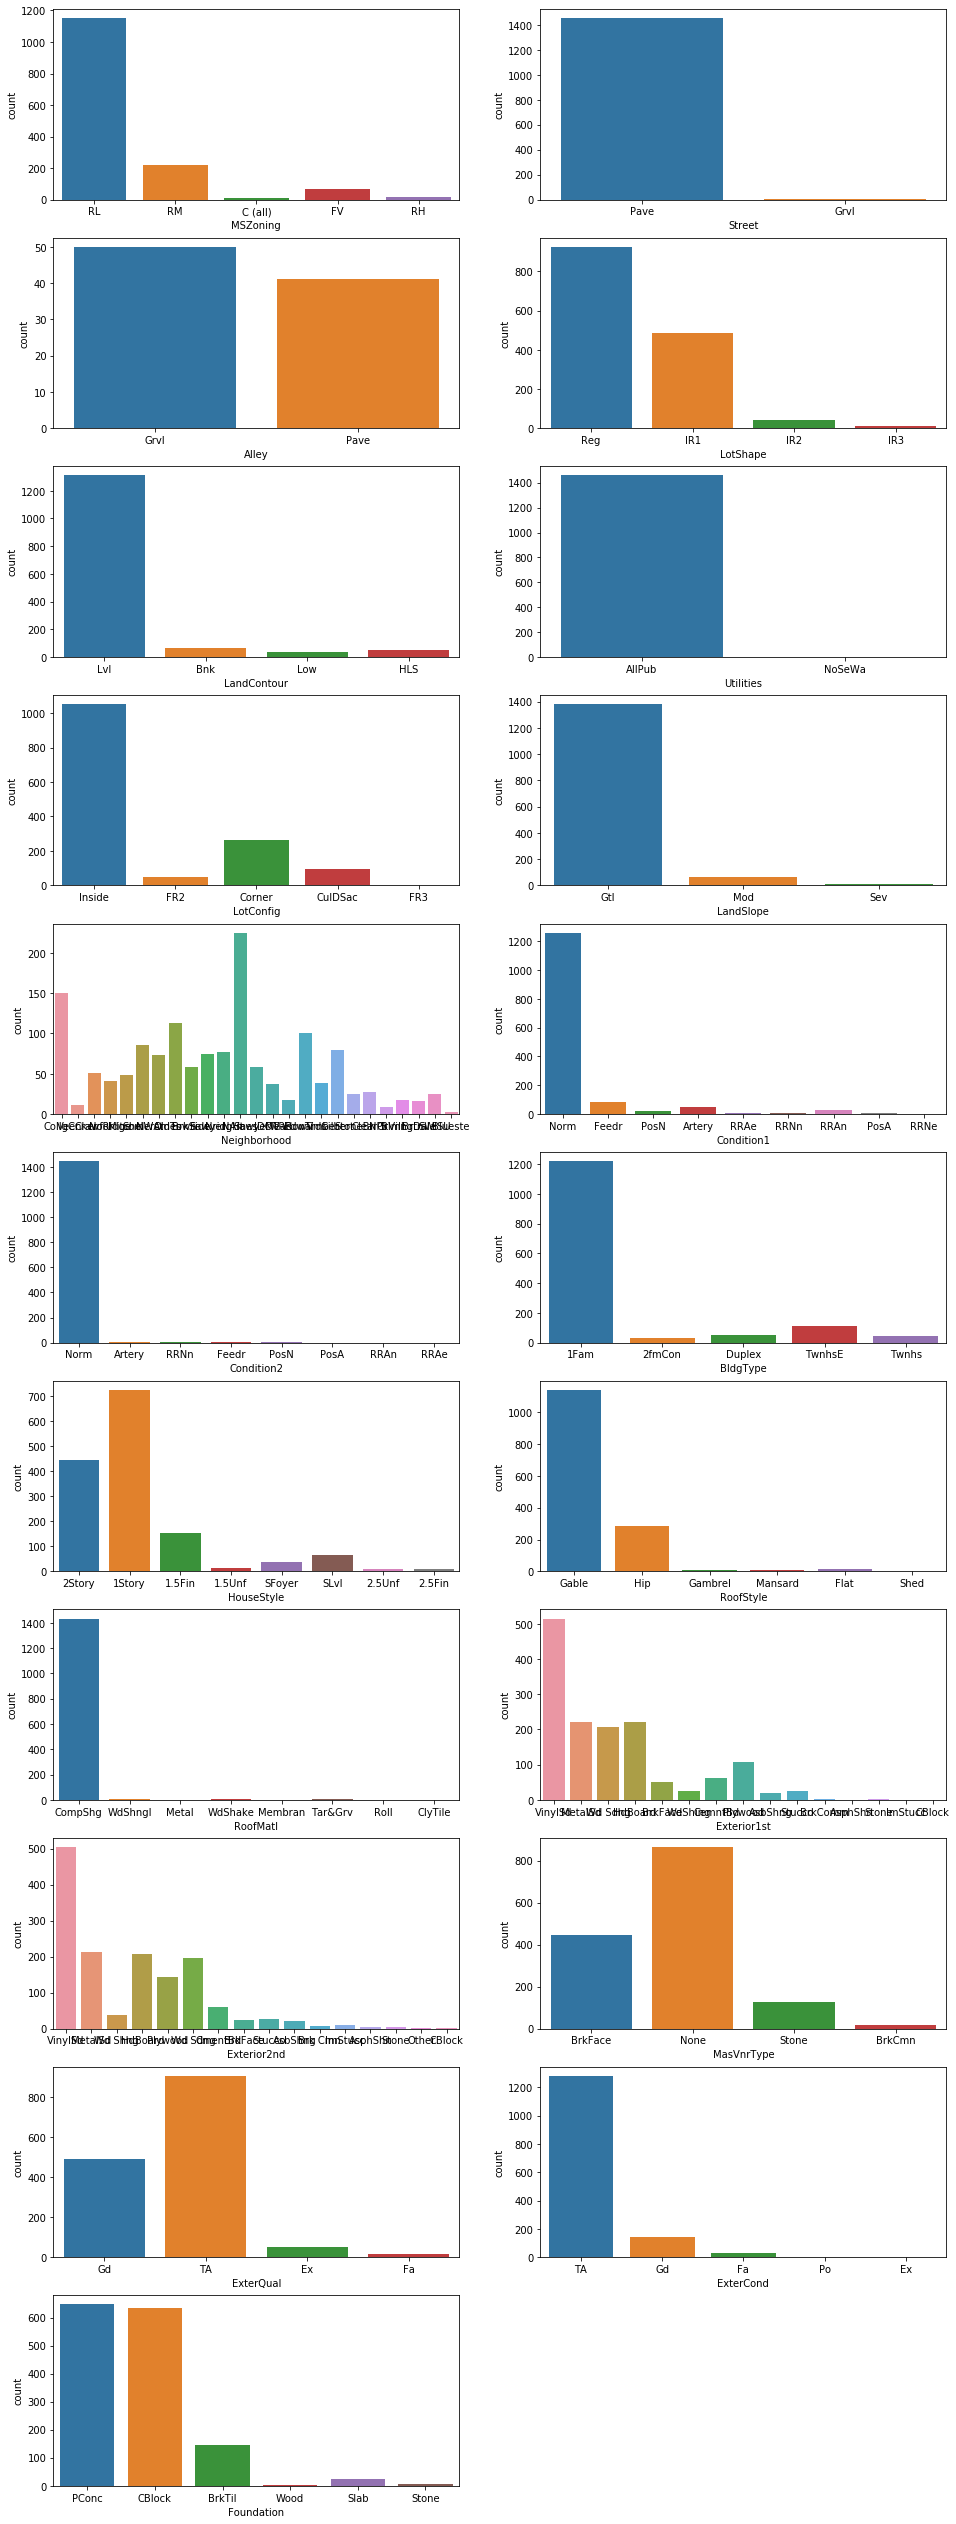

<IPython.core.display.Javascript object>

In [39]:
plt.figure(figsize=(16, 75))
for idx, col in enumerate(rk_var):
    plt.subplot(18, 2, idx + 1)
    sns.countplot(house_data_rk_var[col])

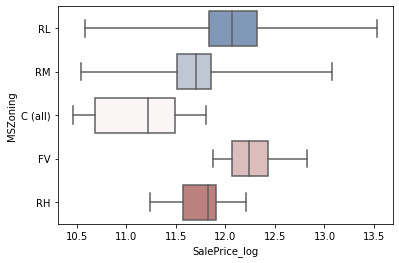

<IPython.core.display.Javascript object>

In [69]:
sns.boxplot(
    x="SalePrice_log", y="MSZoning", data=house_data, whis="range", palette="vlag"
)

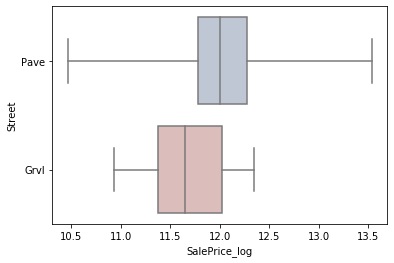

<IPython.core.display.Javascript object>

In [71]:
sns.boxplot(
    x="SalePrice_log", y="Street", data=house_data, whis="range", palette="vlag"
)

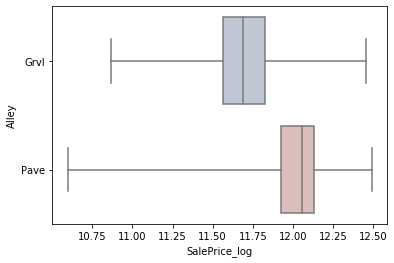

<IPython.core.display.Javascript object>

In [72]:
sns.boxplot(x="SalePrice_log", y="Alley", data=house_data, whis="range", palette="vlag")

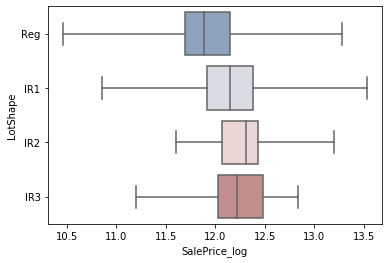

<IPython.core.display.Javascript object>

In [73]:
sns.boxplot(
    x="SalePrice_log", y="LotShape", data=house_data, whis="range", palette="vlag"
)

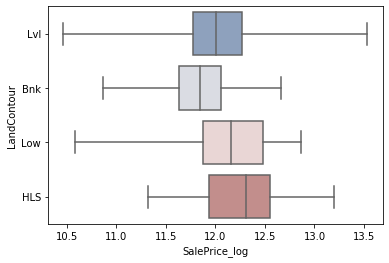

<IPython.core.display.Javascript object>

In [74]:
sns.boxplot(
    x="SalePrice_log", y="LandContour", data=house_data, whis="range", palette="vlag"
)

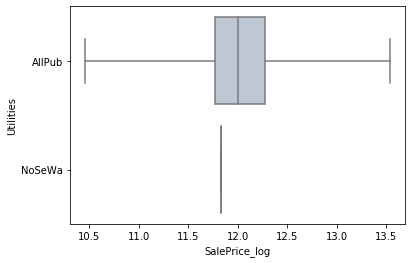

<IPython.core.display.Javascript object>

In [75]:
sns.boxplot(
    x="SalePrice_log", y="Utilities", data=house_data, whis="range", palette="vlag"
)

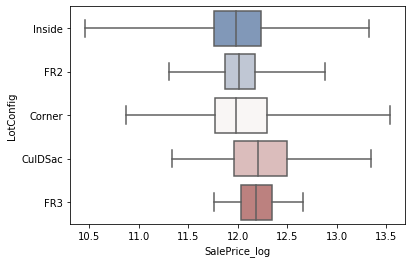

<IPython.core.display.Javascript object>

In [76]:
sns.boxplot(
    x="SalePrice_log", y="LotConfig", data=house_data, whis="range", palette="vlag"
)

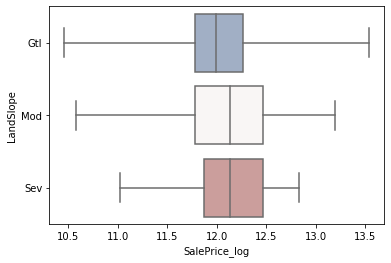

<IPython.core.display.Javascript object>

In [77]:
sns.boxplot(
    x="SalePrice_log", y="LandSlope", data=house_data, whis="range", palette="vlag"
)

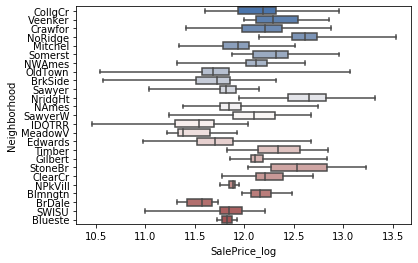

<IPython.core.display.Javascript object>

In [78]:
sns.boxplot(
    x="SalePrice_log", y="Neighborhood", data=house_data, whis="range", palette="vlag"
)

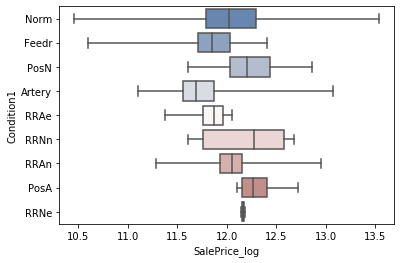

<IPython.core.display.Javascript object>

In [79]:
sns.boxplot(
    x="SalePrice_log", y="Condition1", data=house_data, whis="range", palette="vlag"
)

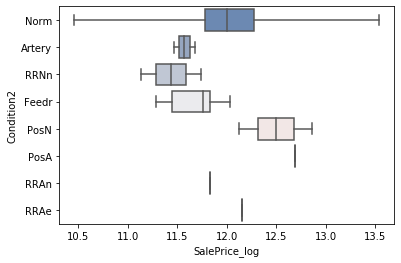

<IPython.core.display.Javascript object>

In [80]:
sns.boxplot(
    x="SalePrice_log", y="Condition2", data=house_data, whis="range", palette="vlag"
)

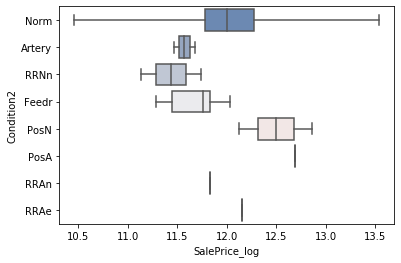

<IPython.core.display.Javascript object>

In [81]:
sns.boxplot(
    x="SalePrice_log", y="Condition2", data=house_data, whis="range", palette="vlag"
)

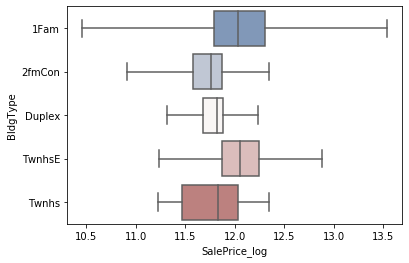

<IPython.core.display.Javascript object>

In [82]:
sns.boxplot(
    x="SalePrice_log", y="BldgType", data=house_data, whis="range", palette="vlag"
)

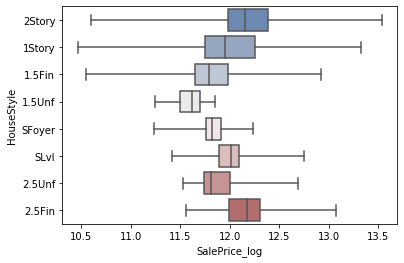

<IPython.core.display.Javascript object>

In [83]:
sns.boxplot(
    x="SalePrice_log", y="HouseStyle", data=house_data, whis="range", palette="vlag"
)

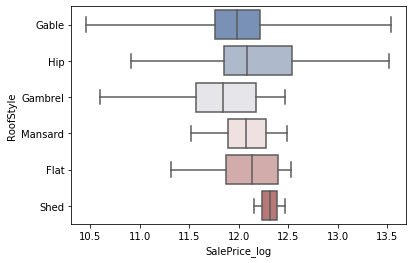

<IPython.core.display.Javascript object>

In [84]:
sns.boxplot(
    x="SalePrice_log", y="RoofStyle", data=house_data, whis="range", palette="vlag"
)

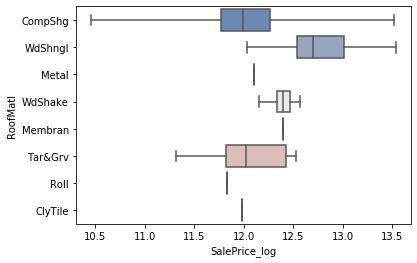

<IPython.core.display.Javascript object>

In [85]:
sns.boxplot(
    x="SalePrice_log", y="RoofMatl", data=house_data, whis="range", palette="vlag"
)

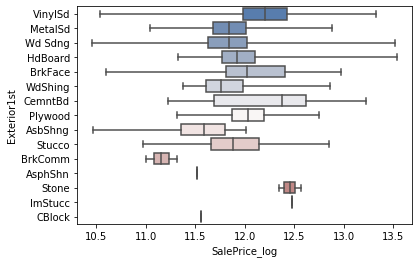

<IPython.core.display.Javascript object>

In [86]:
sns.boxplot(
    x="SalePrice_log", y="Exterior1st", data=house_data, whis="range", palette="vlag"
)

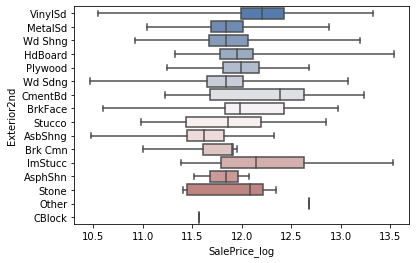

<IPython.core.display.Javascript object>

In [87]:
sns.boxplot(
    x="SalePrice_log", y="Exterior2nd", data=house_data, whis="range", palette="vlag"
)

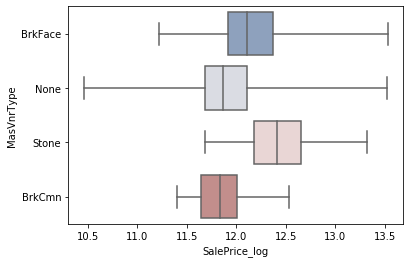

<IPython.core.display.Javascript object>

In [88]:
sns.boxplot(
    x="SalePrice_log", y="MasVnrType", data=house_data, whis="range", palette="vlag"
)

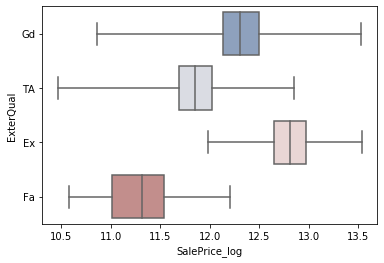

<IPython.core.display.Javascript object>

In [89]:
sns.boxplot(
    x="SalePrice_log", y="ExterQual", data=house_data, whis="range", palette="vlag"
)

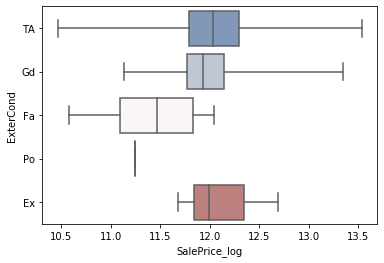

<IPython.core.display.Javascript object>

In [90]:
sns.boxplot(
    x="SalePrice_log", y="ExterCond", data=house_data, whis="range", palette="vlag"
)

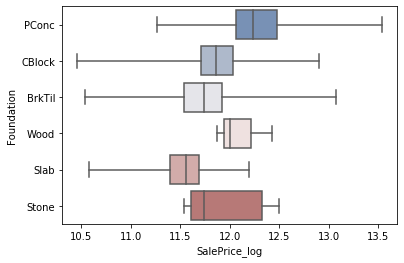

<IPython.core.display.Javascript object>

In [91]:
sns.boxplot(
    x="SalePrice_log", y="Foundation", data=house_data, whis="range", palette="vlag"
)